In [52]:
import numpy as np
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from sqlalchemy import create_engine
import psycopg2
import plotly.figure_factory as ff
import os 
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')

In [45]:
engine = create_engine("postgresql+psycopg2://{user}:{pw}@{service}:{port}/{db}".format(
    user = 'postgres', 
    pw = POSTGRES_PASSWORD, 
    service= "postgres",
    port=5432, 
    db = 'congress', 
))

In [46]:
myquery = '''
SELECT directordername, bioguideid 
FROM members
ORDER BY lastname 
'''

members = pd.read_sql_query(myquery, con=engine)
memberslist = [{"label":x,'value':y} for x,y in zip(members['directordername'], members["bioguideid"])]

In [47]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [48]:
mymarkdown = '''
Congressional elections are usually all about the big, national issues, but the representatives and the senators work for local districts and states. Not all issues are the same everywhere. The purpose of this dashboard is to collect public data from these sources: 

    * [Official API for the U.S. Congress](https://api.congress.gov)
    * [Voteview](https://voteview.com)
    * [Open Secrets](https://www.opensecrets.org/open-data/api)
'''

In [63]:
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(
    [
        # stuff on top 
        html.H1("Know Your Respresentatives in Congress"), 
        html.H2('Data collected from APIs from Congress.gov, Open Secrets, Voteview.com, and ProPublica'),
        html.H3('DS 6600: Data Engineering 1, UVA Data Science'),
        # side bar 
        html.Div([
            dcc.Markdown("Please select a Representative or Senator"),
            dcc.Dropdown(id = 'member',
                        options = memberslist,
                        value = "A000370"),
            dcc.Markdown(mymarkdown),
            
        ],style = {'width':'24%', 'float':'left'}),
        # main bar
        html.Div([
            dcc.Tabs([
               dcc.Tab(label = 'Biographical info', children = [
                   # stuff for bio tab goes here
                   dcc.Graph(id = 'biotable')

               ]),
                dcc.Tab(label = 'Bill Sponsorship', children = [
                   # stuff for bill tab goes here
                   
               ]),
                dcc.Tab(label = 'Voting and Ideology', children = [
                   # stuff for voting tab goes here
                   
               ]),
                dcc.Tab(label = 'Donors and Financial Info', children = [
                   # stuff for donors tab goes here
                   
               ]),
                
            
                
            ])
            
        ],style = {'width':'74%', 'float':'right'})
        
    ]
)


@app.callback([Output(component_id = 'biotable', component_property = 'figure')],
             [Input(component_id = 'member',component_property = 'value')])

def biotable(b):
    myquery = f'''
    SELECT  directordername AS Name,
        party AS Party,
        state AS State,
        CAST(district AS int) AS District,
        birthyear AS Birthyear,
        addressinformation_officeaddress AS Address,
        CONCAT(addressinformation_city, ' , ' , addressinformation_district) AS City,
        addressinformation_zipcode AS Zipcode,
        addressinformation_phonenumber AS Phone 
        
    FROM members 
    WHERE bioguideid = '{b}'
    '''
    mydf = pd.read_sql_query(myquery, con = engine)#.T.reset_index()
    mydf.columns = [x.capitalize() for x in mydf.columns]
    mydf = mydf.T.reset_index()
    mydf = mydf.rename({'index':'',0:''},axis = 1)
    return [ff.create_table(mydf)]


if __name__== "__main__":
    app.run(mode= 'external', host='0.0.0.0', port = 8050, debug=False)

In [60]:

def biotable(b):
    myquery = f'''
    SELECT  directordername AS Name,
        party AS Party,
        state AS State,
        CAST(district AS int) AS District,
        birthyear AS Birthyear,
        addressinformation_officeaddress AS Address,
        CONCAT(addressinformation_city, ' , ' , addressinformation_district) AS City,
        addressinformation_zipcode AS Zipcode,
        addressinformation_phonenumber AS Phone 
        
    FROM members 
    WHERE bioguideid = '{b}'
    '''
    mydf = pd.read_sql_query(myquery, con = engine)#.T.reset_index()
    mydf.columns = [x.capitalize() for x in mydf.columns]
    mydf = mydf.T.reset_index()
    mydf = mydf.rename({'index':'',0:''},axis = 1)
    return ff.create_table(mydf)

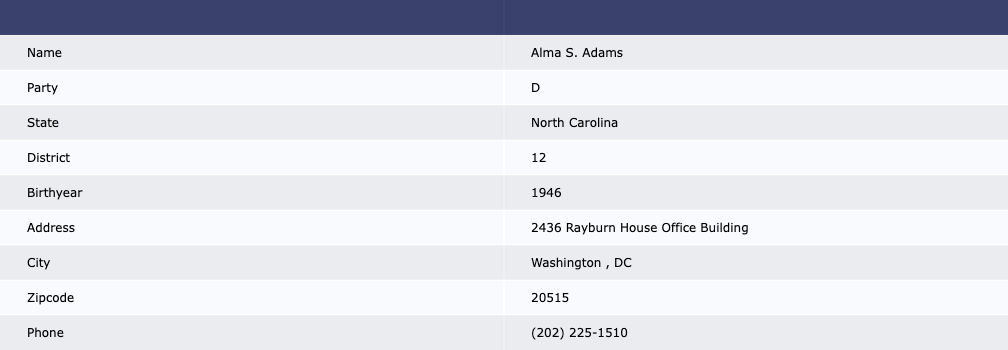

In [61]:
biotable('A000370')